In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from KNN import KNN
from AKDE import AKDE

# demo

# Basic Usage

In [2]:
from scipy.stats import multivariate_normal

import numpy as np

In [3]:
# defin
dim=1  #dimension of data
n_train=1000
n_test=1000
np.random.seed(3)

df1 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])

df2 = pd.DataFrame(columns=["x","f(x)","knn","wknn","k"])

Generate some random data, following multivariatenormal distribution

In [4]:
#define the means and covs of MultiVariateNormal distribution
means=[np.zeros(dim)+1.5,np.zeros(dim)-1.5]
covs=[np.diag(np.ones(dim)*0.05),np.diag(np.ones(dim)*0.3)]

prob_seq = [0.4,0.6]
num_mix=2

#sampling
rd_idx=np.random.choice(num_mix,size=n_train,replace=True,p=prob_seq)
sample_X=[]


for i in range(num_mix):
    num_i=np.sum(rd_idx==i)
    sample_Xi=multivariate_normal.rvs(mean=means[i],cov=covs[i],size=n_train).reshape(-1,dim)
    sample_X.append(sample_Xi)

X_train=np.concatenate(sample_X,axis=0)
np.random.shuffle(X_train)

#caculate the density at given vector of point

num_sample=X_train.shape[0]
pdf_X_train=np.zeros(num_sample, dtype=np.float64) 
for i in range(num_mix):
    prob=prob_seq[i]
    density_i=multivariate_normal.pdf(X_train, mean=means[i], cov=covs[i])
    pdf_X_train+=prob*density_i

#generate test data
range_l,range_u=-3.5,3
X_test=np.arange(range_l,range_u,0.01).reshape(-1,1)
num_samples=X_test.shape[0]
pdf_X_test=np.zeros(num_samples,dtype=np.float64)
for i in range(num_mix):
    prob=prob_seq[i]
    density_i=multivariate_normal.pdf(X_test, mean=means[i], cov=covs[i])
    pdf_X_test+=prob*density_i

In [5]:
#first k
#fit model
k1=50
modelKNN=KNN(k=k1)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k1)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df1["x"]=X_test.ravel()
df1["f(x)"]=pdf_X_test
df1["knn"]=pdf_KNN
df1["wknn"]=pdf_WKNN
df1["k"]=k1

## second k
# fit model 
k2=200
modelKNN=KNN(k=k2)
_=modelKNN.fit(X_train,method="KNN")
pdf_KNN=np.exp(modelKNN.predict(X_test))

modelWKNN=KNN(k=k2)
_=modelWKNN.fit(X_train,method="WKNN")
pdf_WKNN=np.exp(modelWKNN.predict(X_test))
# change frame
df2["x"]=X_test.ravel()
df2["f(x)"]=pdf_X_test
df2["knn"]=pdf_KNN
df2["wknn"]=pdf_WKNN
df2["k"]=k2

# Plotting Smooth Distributions

(-3.5, 3.0)

(-3.5, 3.0)

(-0.04999999983717682, 0.9634272031405825)

(-0.04999999983717682, 0.9634272031405825)

Text(0.5, 0, 'x')

Text(0.5, 0, 'x')

Text(0, 0.5, 'Density')

Text(0, 0.5, 'Density')

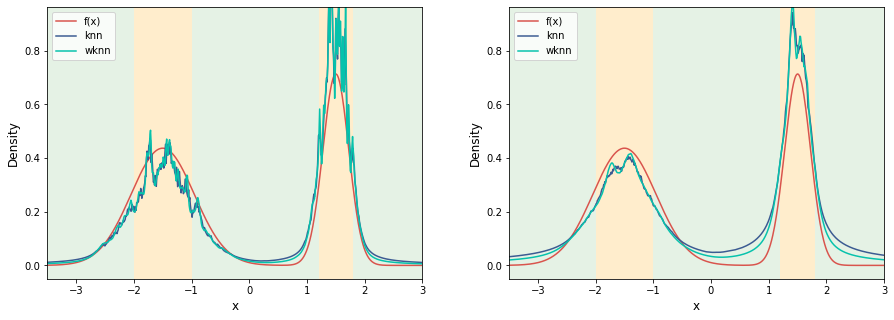

In [6]:
# generate screen
fig = plt.figure(figsize=(15,5))
ax=[]
ax.append(plt.subplot2grid((1,15), (0, 0), colspan=7))
ax.append(plt.subplot2grid((1,15), (0, 8), colspan=7))
plt.subplots_adjust(wspace=1,hspace=0.5)


# set back ground
rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
ax[0].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
ax[0].add_patch(rectangle)

#ax[0].axhline(0.3,lw=1,color="black",linestyle='--')

rectangle=patches.Rectangle((1.2, -0.1), 0.6, 5,facecolor="orange",alpha=0.2)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-2, -0.1), 1, 5,facecolor="orange",alpha=0.2)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-3.5, -0.1), 1.5, 5,facecolor="green",alpha=0.1)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((-1, -0.1), 2.2, 5,facecolor="green",alpha=0.1)
ax[1].add_patch(rectangle)
rectangle=patches.Rectangle((1.8, -0.1), 1.2, 5,facecolor="green",alpha=0.1)
ax[1].add_patch(rectangle)

#ax[1].axhline(0.3,lw=1,color="black",linestyle='--')


# plot lines
line1, = ax[0].plot(df1["x"], df1['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line2, = ax[0].plot(df1["x"], df1['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'knn')
line3, = ax[0].plot(df1["x"], df1['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'wknn')
line4, = ax[1].plot(df1["x"], df2['f(x)'],color = sns.xkcd_rgb["pale red"],linestyle = '-',label = 'f(x)')
line5, = ax[1].plot(df1["x"], df2['knn'],color = sns.xkcd_rgb["denim blue"],linestyle = '-',label = 'knn')
line6, = ax[1].plot(df1["x"], df2['wknn'],color = sns.xkcd_rgb["turquoise"],linestyle = '-',label = 'wknn')
# set axis x
ax[0].set_xlim([range_l,range_u])
ax[1].set_xlim([range_l,range_u])

# set axis y leaving margin
interval_l,interval_u=df1["f(x)"].to_numpy().min(),df1["f(x)"].to_numpy().max()
ax[0].set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))

ax[1].set_ylim(interval_l-0.05,interval_u+0.35*(interval_u-interval_l))

# set text
ax[1].set_xlabel("x",fontsize = 12)
ax[0].set_xlabel("x",fontsize = 12)
ax[0].set_ylabel("Density",fontsize = 12)
ax[1].set_ylabel("Density",fontsize = 12)



ax[1].legend(handles = [line1,line2,line3],loc="upper left")
ax[0].legend(handles = [line1,line2,line3],loc="upper left")

plt.show()